# **Simple Linear Regression in R**

In [2]:
# Importing the dataset
ds = read.csv('/content/Salary_Data.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731


In [4]:
# Splitting the dataset into the Training set and Test set
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Salary, SplitRatio = 2/3)
split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[13]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE
[25]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

In [5]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,3))

  YearsExperience Salary
1             1.1  39343
3             1.5  37731
6             2.9  56642


In [6]:
# Fitting Simple Linear Regression to the Training set
regressor = lm(formula = Salary ~ YearsExperience,
               data = train_set)

# Predicting the Test set results
y_pred = predict(regressor, newdata = test_set)
print(head(y_pred,3))

       2        4        5 
37766.77 44322.33 46195.35 


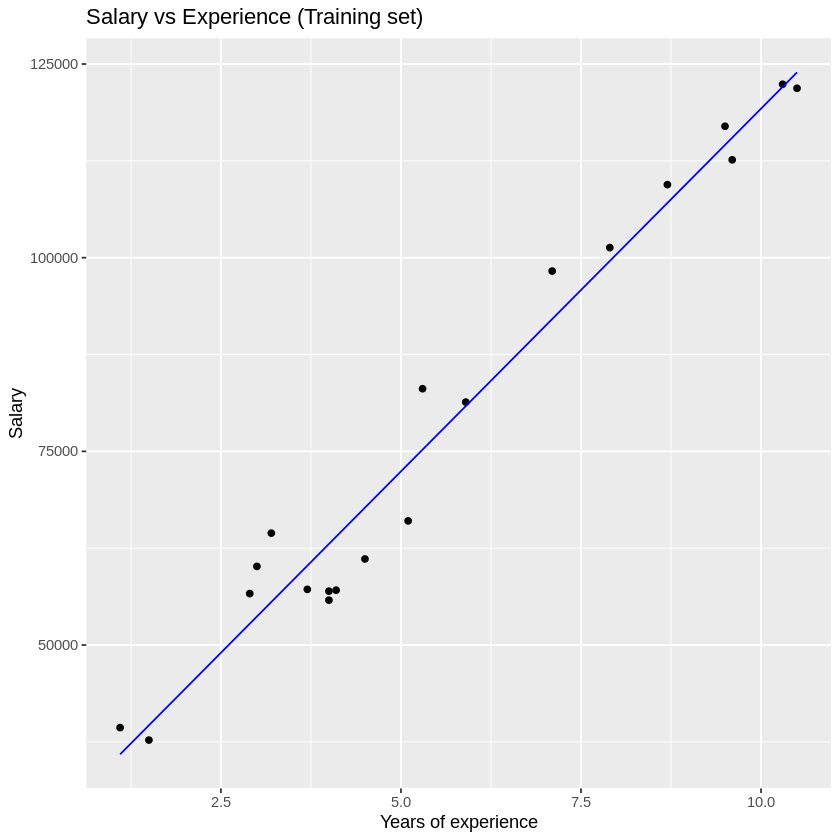

In [7]:
# Visualising the Training set results
#install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$YearsExperience, y = train_set$Salary),
             colour = 'black') +
  geom_line(aes(x = train_set$YearsExperience, y = predict(regressor, newdata = train_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Training set)') +
  xlab('Years of experience') +
  ylab('Salary')

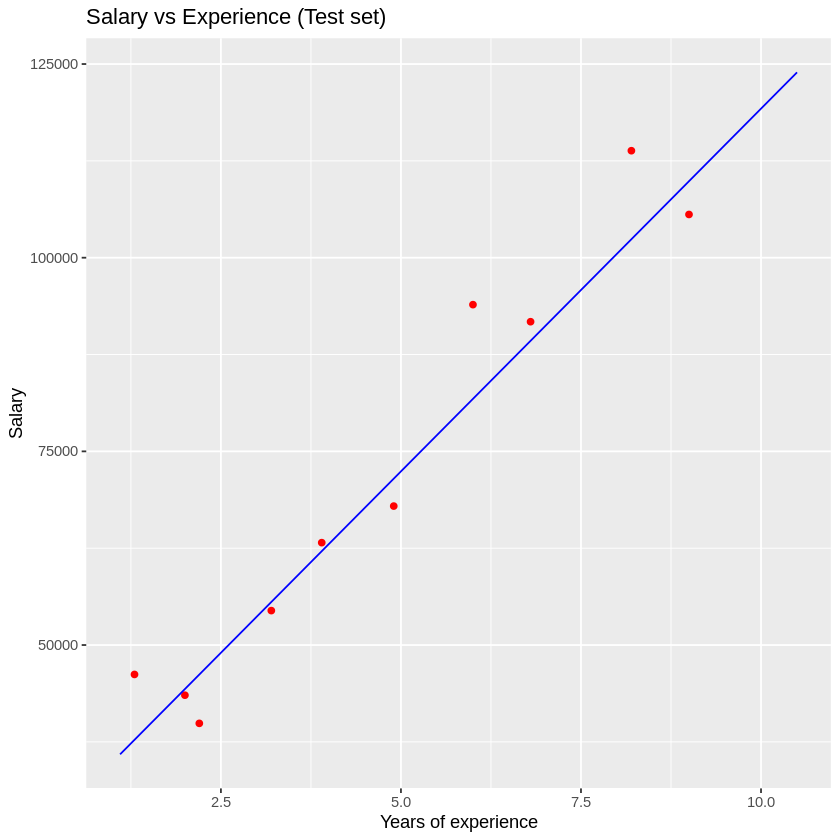

In [8]:
# Visualising the Test set results
library(ggplot2)
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = train_set$YearsExperience, y = predict(regressor, newdata = train_set)), # Original regressor line. Prediction is based on this line. 
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')